# Modelling Insurance Claims

## Extreme Value Theory

<p style = "text-align:center"> $F(x) = P(X \leq x)$ </p>

<p style = "text-align:center"> $Y = X - u$ </p>

For a given threshold $u$, the excess loss over the threshold Y has the following distribution function:

<p style = "text-align:center"> $F_u(y) = P(X - u \leq y | x > u) = \frac{F(y+u) - F(u}{(1-F(u)}$ </p>

$X:$ The random loss that we want to model

$F(x):$ Distribution function

$u:$ a given threshold

$Y:$ excess loss over the threshold

## Fire Insurnace Claims from Denmark

Data: Large industrial fire insurance claims from Denmark
Period: 1980 - 1990

The data shows all fire losses exceeding one million Danish Kroner

In [3]:
# Load evir package
library(evir)

# Use Danish insurance claims data

data(danish)

# Number of observations

obs <- length(danish)
print("Observations")
obs

# The maximum insurance claim is 263.25 million Danish kroner

max_danish <- max(danish)
print("Maximum insurance claim (millions)")
max_danish

# The minimum insurance claim 

min_danish <- min(danish)
print("Minimum insurance claim (millions)")
min_danish

# The mean insurance claim

mean_danish <- mean(danish)
print("Mean insurance claim")
mean_danish

[1] "Observations"


[1] 2167

[1] "Maximum insurance claim (millions)"


[1] 263.2504

[1] "Minimum insurance claim (millions)"


[1] 1

[1] "Mean insurance claim"


[1] 3.385088

## Plot the complementary cumulative distribution function (ccdf)

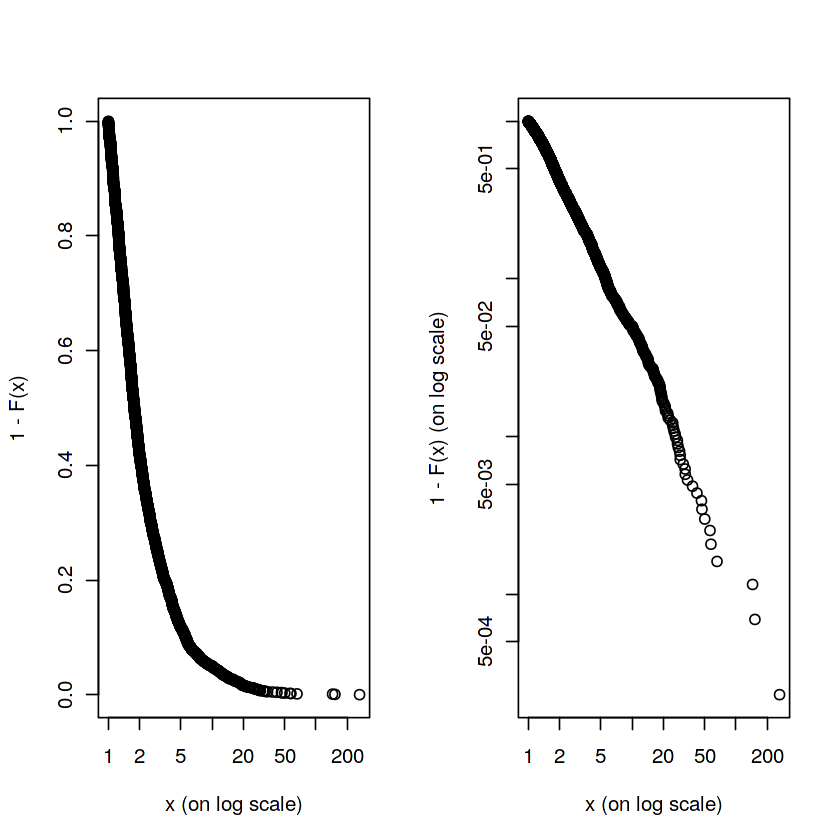

In [4]:
# CCDF is not linear unless we use logarithmic scales for both axes

par(mfcol=c(1,2))
emplot(danish)
emplot(danish, alog="xy")

This shows the empirical probability of the claims exceeding any given threshold and shows the fait-tailed nature of the data.

Figure 2 uses logarithms for both axes and shows that the claims may follow a Pareto-Type distribution.

## Mean Excess Function Plot

The Mean Excess Function is the average excess of the random variable $X$ over the threshold $u$, i.e. the sample mean excesses over increasing thresholds.

<p style="text-align:center"> $e(u) = E[x-u|x>u]$ </p>

The plot determines the threshold $u$.

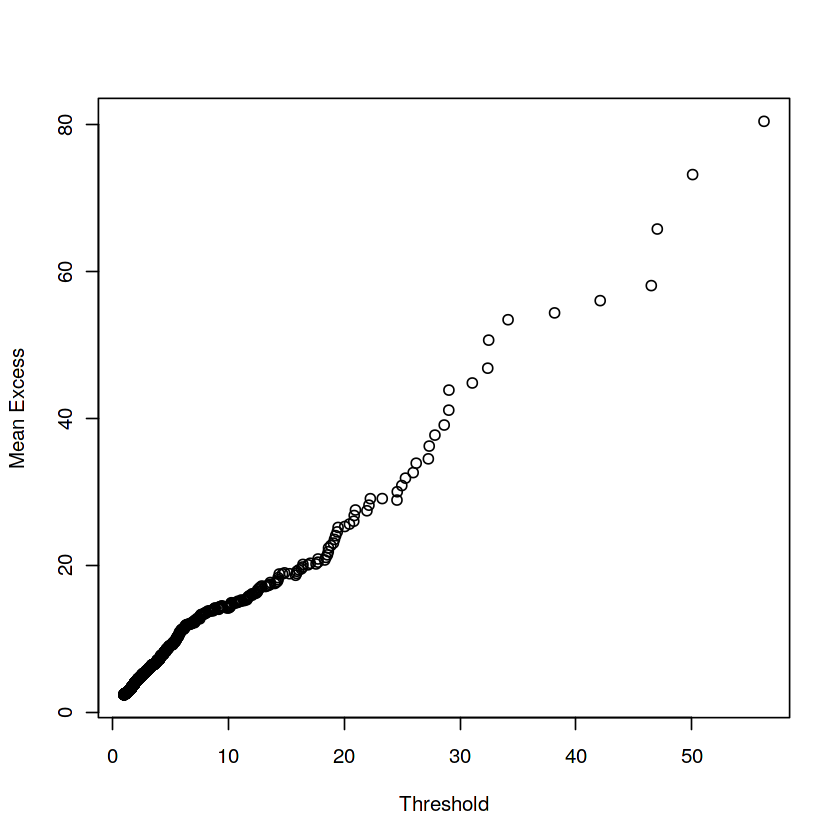

In [19]:
# Omit argument eliminates the indicated number of upper points

meplot(danish, omit = 5)

## Determining the Threshold

We can use the visual inspection of the plot to determine a threshold $u$.

<p style="text-align:center"> $u \in $ $\begin{cases}
  [0, 10], \text{There is a slight curve inducating that smaller losses might be modelled using a different law}\\      
  [10,20], \text{Linear graph}\\
  > 20, \text{Sparse data}
\end{cases}$ </p>

In this case, given the plot of the Excess Mean Function, we can conclude that $u = 20 $ is a good threshold

## Fitting a GPD Distribution to the Tails

$F_u(y)$ distribution of excess losses over a high threshold $u$ converges to a Generalized Pareto Distribution (GPD).

<p style = "text-align: center"> $F_u(y) = G_{\xi,\beta}(y)$ </p>

In [5]:
gpdfittedparameters <- gpd(danish, threshold=20)
gpdfittedparameters

$n
[1] 2167

$data
 [1]  26.21464  21.96193 263.25037  34.14155  20.96986  56.22543  50.06553
 [8]  24.97027  20.04994  65.70749  27.26259  22.25823  22.13757  46.50000
[15]  57.41064  29.02604  23.28386  32.46753  29.03711  27.82931  38.15439
[22]  27.33807  25.28838  20.45253  47.01952  24.57853  25.95386  31.05590
[29]  24.55546  42.09145  20.86367 152.41321  32.38781  20.82673 144.65759
[36]  28.63036

$threshold
[1] 20

$p.less.thresh
[1] 0.9833872

$n.exceed
[1] 36

$method
[1] "ml"

$par.ests
       xi      beta 
0.6840479 9.6316941 

$par.ses
       xi      beta 
0.2749542 2.8958268 

$varcov
            [,1]       [,2]
[1,]  0.07559979 -0.4202254
[2,] -0.42022538  8.3858127

$information
[1] "observed"

$converged
[1] 0

$nllh.final
[1] 142.1845

attr(,"class")
[1] "gpd"

```r $n.exceed = 36 ``` is the number of insurance claims that exceed the threshold

```r $method = "ml" ``` is the Maximum Likelihood Estimation method used for estimating $\xi$ and $\beta$ parameters of the GPD distribution

```r $par.ests" ``` $\xi$ and $\beta$ estimated parameters

```r $par.ses = "ml" ``` standard errors

## Calculating Expected Loss

The Loss Distribution Function:

<p style = "text-align: center"> $F(x) = [1-F(u)]G_{\xi,\beta}(x-u) + F(u)$ </p>

$F(u)$ is estimated empirically

### Tail of the Danish fire loss data with estimated  99.9% quantile

Lower CI  Estimate  Upper CI 
 63.27843 102.18226 310.68768

Lower CI Estimate Upper CI 
23.44016 25.84510 29.79587

Lower CI  Estimate  Upper CI 
 42.16106  68.98463 394.87555

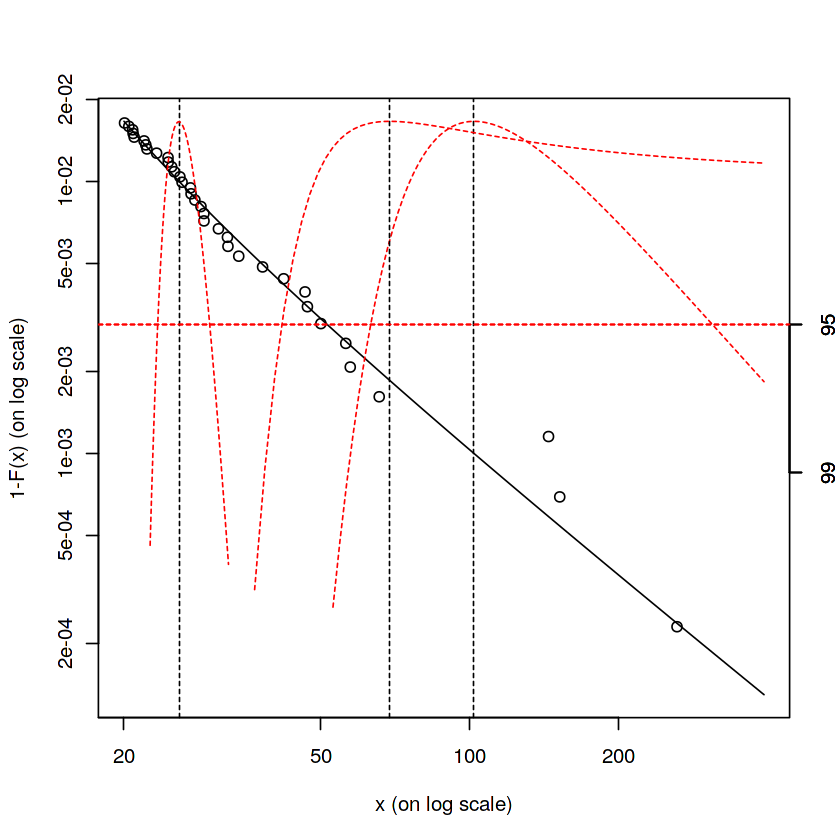

In [11]:
library(evir)
data(danish)

gdpfittedparameters <- gpd(danish, threshold = 20)
tp <- tailplot(gpdfittedparameters)

# Non-Parametric Estimation of Value at Risk using quantiles
# The estimated 99.9% quantile is 102.18 million Danish kroner

gpd.q(tp,pp = 0.999, ci.p = 0.95)

# The estimated 99.9% quantile is 25.845 million Danish kroner
gpd.q(tp,pp = 0.99)

# The estimated 99.9% quantile is 68.98 million Danish kroner
gpd.sfall(tp,0.99)

The first vertical dahsed line - 99% quantile or VaR

The first curved dashed red line - likelihood curve

The second vertical dashed line - 99% expected shortfall

The second curved dashed red line - Likelihood curve